In [37]:
import finquant

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

# Data 

Source: https://www.kaggle.com/jacksoncrow/stock-market-dataset

In [4]:
astypes = {'Volume': np.int64 }
float32s = { t : np.float32 for t in {'Open', 'High', 'Low', 'Close','Adj Close'}}
astypes.update(float32s)
df = pd.read_csv("DATA.csv", parse_dates=['Date'], low_memory=False, dtype=float32s, index_col=['Symbol'])

In [6]:
the_four = df.loc[['GOOG', 'AMZN', 'MCD', 'DIS']]

In [20]:
pf_data = the_four[['Date', 'Open']].reset_index().pivot_table(index=['Date'], columns=['Symbol'], values=['Open']).dropna().droplevel(0, axis=1)

# Work in Progress

Reference:  https://finquant.readthedocs.io/en/latest/examples.html#building-a-portfolio-with-preset-data


In [23]:
from finquant.portfolio import build_portfolio

pf = build_portfolio(data=pf_data)

In [33]:
pf.properties()

----------------------------------------------------------------------
Stocks: AMZN, DIS, GOOG, MCD
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.208
Portfolio Volatility: 0.220
Portfolio Sharpe Ratio: 0.922

Skewness:
       AMZN       DIS      GOOG       MCD
0  1.437273  0.496559  0.919037  0.761292

Kurtosis:
       AMZN       DIS      GOOG     MCD
0  0.730993 -1.235347 -0.357821 -0.1958

Information:
   Allocation  Name
0        0.25  AMZN
1        0.25   DIS
2        0.25  GOOG
3        0.25   MCD
----------------------------------------------------------------------


In [51]:
pf.comp_mean_returns()

AMZN    0.323052
DIS     0.125804
GOOG    0.246815
MCD     0.135884
dtype: float32

In [52]:
pf.comp_cumulative_returns()

,AMZN,DIS,GOOG,MCD
Date,,,,
2004-08-19,0.000000,0.000000,0.000000,0.000000
2004-08-20,-0.044709,0.002252,0.010100,0.000000
2004-08-23,-0.009190,0.006757,0.107500,0.023054
2004-08-24,-0.013413,0.009009,0.112400,0.005291
2004-08-25,-0.029806,0.000451,0.049600,0.014361
...,...,...,...,...
2020-03-26,46.242924,3.604047,21.319349,5.197657
2020-03-27,46.959763,3.586695,21.597788,5.151928
2020-03-30,46.760307,3.383502,21.585140,5.232804


In [53]:
pf.comp_daily_log_returns()

,AMZN,DIS,GOOG,MCD
Date,,,,
2004-08-20,-0.045740,0.002250,0.010049,0.000000
2004-08-23,0.036507,0.004484,0.092056,0.022792
2004-08-24,-0.004271,0.002235,0.004415,-0.017515
2004-08-25,-0.016756,-0.008518,-0.058111,0.008982
2004-08-26,0.028270,0.016079,-0.000095,0.005944
...,...,...,...,...
2020-03-26,-0.009779,0.001687,-0.013108,-0.006140
2020-03-27,0.015059,-0.003776,0.012398,-0.007406
2020-03-30,-0.004167,-0.045312,-0.000560,0.013061


# Stock values (>0)

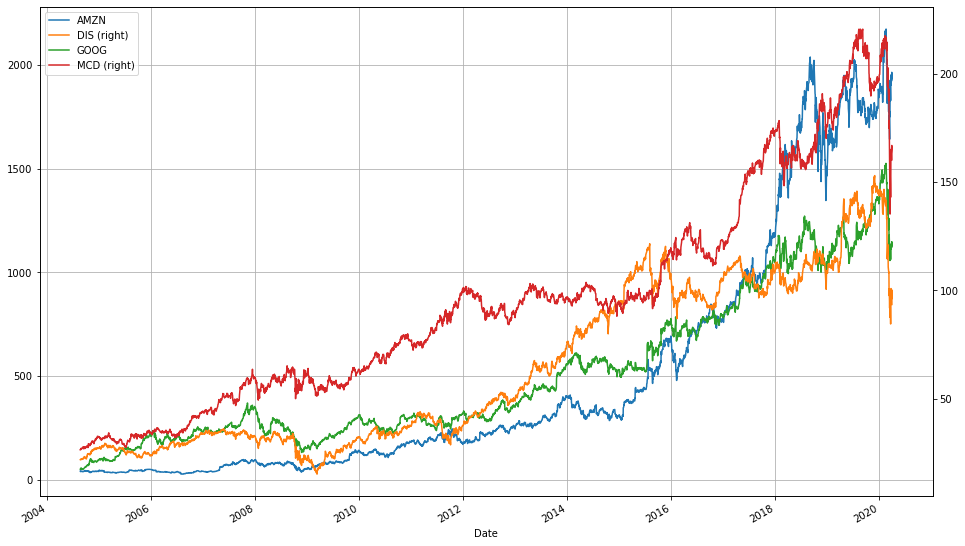

In [56]:
pf.data.plot(secondary_y=['MCD', 'DIS'], figsize=(16,10), grid=True)

# Cumulative Returns

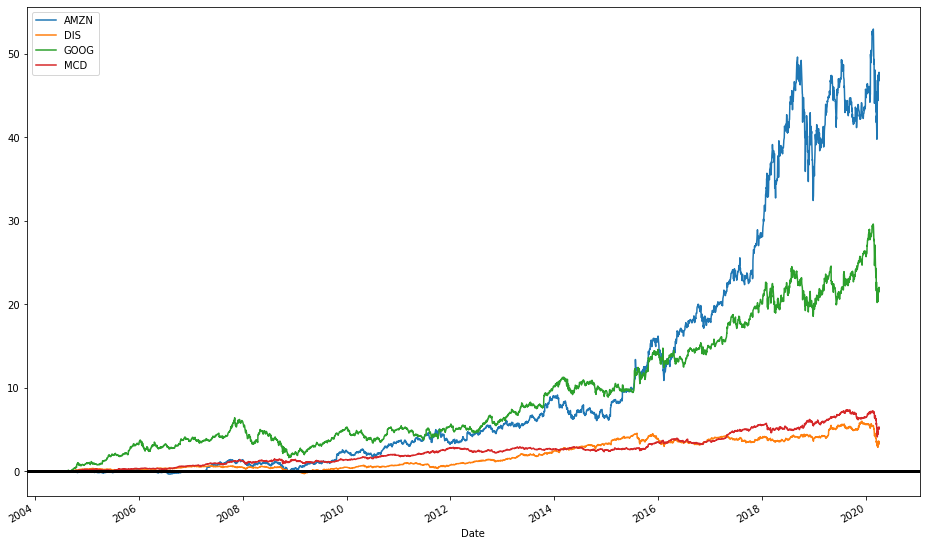

In [59]:
pf.comp_cumulative_returns().plot(figsize=(16,10)).axhline(y=0, color="black", lw=3)

# Simple Moving Average

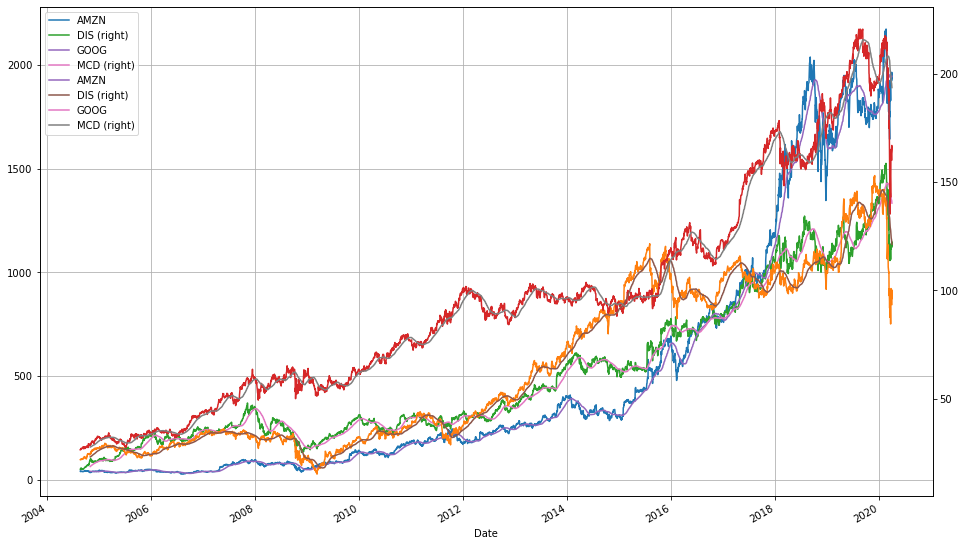

In [66]:

from finquant.moving_average import sma

# simple moving average
ax = pf.data.plot(secondary_y=["MCD", "DIS"], grid=True, figsize=(16,10))

# computing simple moving average over a span of 50 (trading) days and plotting it
sma(pf.data, span=50).plot(ax=ax, secondary_y=["MCD", "DIS"], grid=True, figsize=(16,10))

# Exponential Moving Average

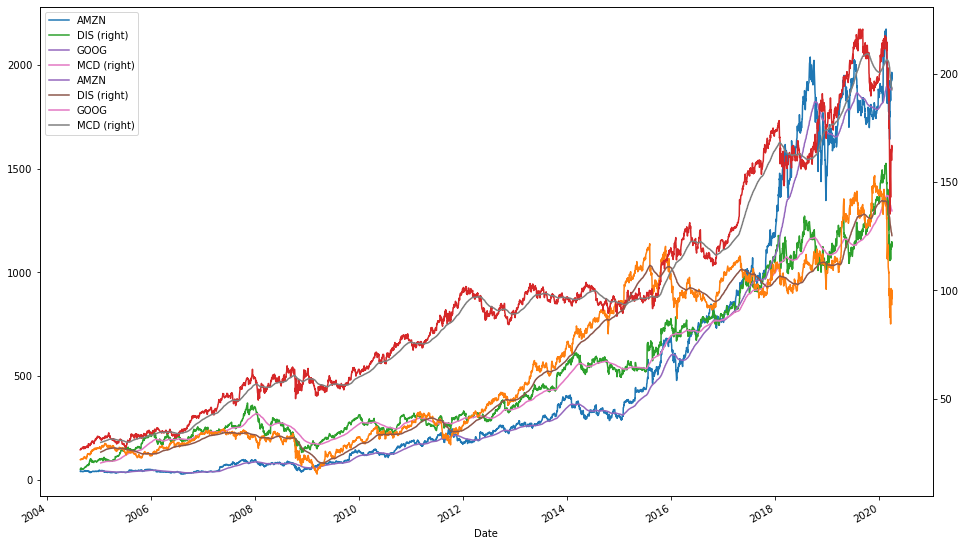

In [69]:

from finquant.moving_average import ema

# exponential moving average
ax = pf.data.plot(secondary_y=["MCD", "DIS"], grid=True, figsize=(16,10))
# computing exponential moving average and plotting it
ema(pf.data).plot(ax=ax, secondary_y=["MCD", "DIS"], figsize=(16,10))

# Compute MA

In [71]:
from finquant.moving_average import compute_ma

d:\github-live\stock-market-jupyter\finquantsource\finquant\moving_average.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals["diff"][minspan:] = np.where(


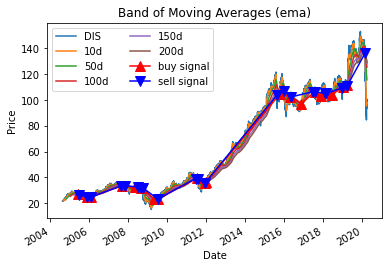

In [85]:
dis = pf.get_stock("DIS").data.copy(deep=True)
# we want moving averages of 10, 50, 100, and 200 days.
spans = [10, 50, 100, 150, 200]
# compute and plot moving averages
dis_ma = compute_ma(dis, ema, spans, plot=True)


# Bollinger Bands

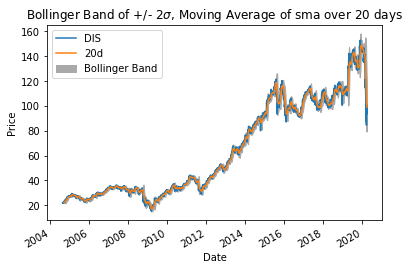

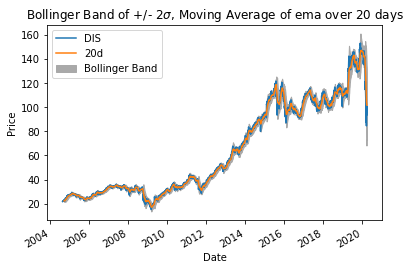

In [90]:
from finquant.moving_average import plot_bollinger_band

# get stock data for disney
dis = pf.get_stock("DIS").data.copy(deep=True)
span = 20
# for simple moving average:
plot_bollinger_band(dis, sma, span)
#plt.show()
# for exponential moving average:
plot_bollinger_band(dis, ema, span)
#plt.show()


# Portfolio Optimization

In [92]:

pf.ef_minimum_volatility(verbose=True)


----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.148
Annual Volatility: 0.187
Sharpe Ratio: 0.766

Optimal weights:
                AMZN       DIS      GOOG       MCD
Allocation  0.001362  0.215852  0.130778  0.652008
----------------------------------------------------------------------


,Allocation
AMZN,0.001362
DIS,0.215852
GOOG,0.130778
MCD,0.652008


In [94]:
pf.ef_maximum_sharpe_ratio(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.229
Annual Volatility: 0.231
Sharpe Ratio: 0.971

Optimal weights:
                AMZN           DIS     GOOG       MCD
Allocation  0.308656  4.336809e-18  0.32249  0.368853
----------------------------------------------------------------------


,Allocation
AMZN,3.086564e-01
DIS,4.336809e-18
GOOG,3.224902e-01
MCD,3.688533e-01


In [95]:
pf.ef_efficient_return(0.26, verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Efficient Return

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.260
Annual Volatility: 0.267
Sharpe Ratio: 0.956

Optimal weights:
               AMZN  DIS      GOOG       MCD
Allocation  0.43422  0.0  0.386222  0.179558
----------------------------------------------------------------------


,Allocation
AMZN,0.434220
DIS,0.000000
GOOG,0.386222
MCD,0.179558


In [96]:
pf.ef_efficient_volatility(0.22, verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Efficient Volatility

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.218
Annual Volatility: 0.220
Sharpe Ratio: 0.968

Optimal weights:
                AMZN  DIS      GOOG      MCD
Allocation  0.262312  0.0  0.297618  0.44007
----------------------------------------------------------------------


,Allocation
AMZN,0.262312
DIS,0.000000
GOOG,0.297618
MCD,0.440070


## Efficient Frontier

In [97]:
from finquant.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(pf.comp_mean_returns(freq=1), pf.comp_cov())

ef.minimum_volatility()

,Allocation
AMZN,0.001362
DIS,0.215852
GOOG,0.130778
MCD,0.652008


In [98]:
(expected_return, volatility, sharpe) = ef.properties(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.148
Annual Volatility: 0.187
Sharpe Ratio: 0.766

Optimal weights:
                AMZN       DIS      GOOG       MCD
Allocation  0.001362  0.215852  0.130778  0.652008
----------------------------------------------------------------------


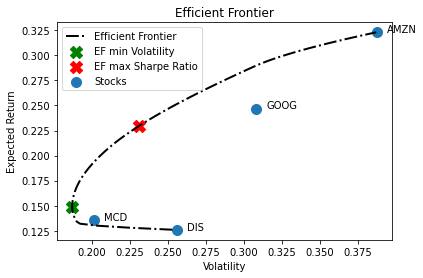

In [99]:
# #### Efficient Frontier of `pf`

# computing and plotting efficient frontier of pf
pf.ef_plot_efrontier()
# adding markers to optimal solutions
pf.ef_plot_optimal_portfolios()
# and adding the individual stocks to the plot
pf.plot_stocks()
plt.show()